In [3]:
!pip install pandas
!pip install xlrd
!pip install sklearn
!pip install imblearn

In [9]:
import xlrd
book = xlrd.open_workbook("Datasheets info.xlsx")
sheetMQ2 = book.sheet_by_name("MQ2 - Pololulu")
sheetMQ3 = book.sheet_by_name("MQ3 - Sparkfun")
sheetMQ4 = book.sheet_by_name("MQ4 - Sparkfun")
sheetMQ5 = book.sheet_by_name("MQ5 - Sparkfun")
sheetMQ6 = book.sheet_by_name("MQ6 - Sparkfun")
sheetMQ7 = book.sheet_by_name("MQ7 - Sparkfun")
sheetMQ8 = book.sheet_by_name("MQ8 - Sparkfun")
sheetMQ9 = book.sheet_by_name("MQ9 - Haoyuelectronics")
sheetMQ131 = book.sheet_by_name("MQ131- Sensorsportal")
sheetMQ135 = book.sheet_by_name("MQ135 - HANWEI")
sheetMQ303A = book.sheet_by_name("MQ303A - HANWEI")
sheetMQ309A = book.sheet_by_name("MQ309A - HANWEI")

In [10]:
for row_index in range(1,20): #reading first columns
    RsR0, LPG, CO, CH4 = sheetMQ9.row_values(row_index, start_colx=0, end_colx=4)
    print(RsR0, "	", LPG, "	", CO, "	", CH4)
 

0.1 	  	  	 
0.2 	  	  	 
0.3 	  	  	 
0.4 	  	  	 
0.5 	  	  	 
0.6 	 3000.0 	  	 
0.7 	  	  	 1000.0
0.8 	  	 1000.0 	 
0.9 	  	 800.0 	 5000.0
1.0 	 1000.0 	  	 
2.0 	 200.0 	 200.0 	 
3.0 	  	  	 200.0
4.0 	  	  	 
5.0 	  	  	 
6.0 	  	  	 
7.0 	  	  	 
8.0 	  	  	 
9.0 	  	  	 
10.0 	  	  	 


In [11]:
x_MQ9 = sheetMQ9.col_values(0)[2:]
MQ9_LPG = sheetMQ9.col_values(1)[2:]
MQ9_CO = sheetMQ9.col_values(2)[2:]
MQ9_CH4 = sheetMQ9.col_values(3)[2:]

In [12]:
def zero_to_nan(values):
    """Replace every 0 with 'nan' and return a copy."""
    return [float('nan') if x==0 else x for x in values]

In [13]:
MQ9_LPG =zero_to_nan(MQ9_LPG)
MQ9_CH4 =zero_to_nan(MQ9_CH4)
MQ9_CO =zero_to_nan(MQ9_CO)

In [14]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
#from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from sklearn import linear_model

dataLPG = {'RsRo': x_MQ9, 'LPG': MQ9_LPG}
dataCH4 = {'RsRo': x_MQ9, 'CH4': MQ9_CH4}
dataCO = {'RsRo': x_MQ9, 'CO': MQ9_CO}

dfMQ9_LPG = pd.DataFrame(dataLPG)
dfMQ9_CH4 = pd.DataFrame(dataCH4)
dfMQ9_CO = pd.DataFrame(dataCO)

dfMQ9_LPG['LPG'] = pd.to_numeric(dfMQ9_LPG['LPG'])
dfMQ9_CH4['CH4'] = pd.to_numeric(dfMQ9_CH4['CH4'])
dfMQ9_CO['CO'] = pd.to_numeric(dfMQ9_CO['CO'])

dfMQ9_LPG['LPG'] = dfMQ9_LPG['LPG'].replace('',None, regex=True)
dfMQ9_CH4['CH4'] = dfMQ9_CH4['CH4'].replace('',None, regex=True)
dfMQ9_CO['CO'] = dfMQ9_CO['CO'].replace('',None, regex=True)

#Global X_Predict variable
X_Predict = dfMQ9_LPG.RsRo.apply(lambda x: [x]).tolist()

In [15]:
#Model and train LPG
dataset2TrainLPG = dfMQ9_LPG.copy()
dataset2TrainLPG.dropna(inplace=True)
X_trainLPG = dataset2TrainLPG.RsRo.apply(lambda x: [x]).tolist()
y_trainLPG = dataset2TrainLPG['LPG'].tolist()
model = linear_model.Lasso(alpha=0.1)
model.fit(X_trainLPG, y_trainLPG)
#Predict
LPG_Predicted = model.predict(X_Predict)
#save into MQ2
MQ9_LPG = LPG_Predicted

In [16]:
#Model and train CH4
dataset2TrainCH4 = dfMQ9_CH4.copy()
dataset2TrainCH4.dropna(inplace=True)
X_trainCH4 = dataset2TrainCH4.RsRo.apply(lambda x: [x]).tolist()
y_trainCH4 = dataset2TrainCH4['CH4'].tolist()
model = linear_model.Lasso(alpha=0.1)
model.fit(X_trainCH4, y_trainCH4)
#Predict
CH4_Predicted = model.predict(X_Predict)
#save into MQ2
MQ9_CH4 = CH4_Predicted

In [17]:
#Model and train CO
dataset2TrainCO = dfMQ9_CO.copy()
dataset2TrainCO.dropna(inplace=True)
X_trainCO = dataset2TrainCO.RsRo.apply(lambda x: [x]).tolist()
y_trainCO = dataset2TrainCO['CO'].tolist()
model = linear_model.Lasso(alpha=0.1)
model.fit(X_trainCO, y_trainCO)
#Predict
CO_Predicted = model.predict(X_Predict)
#save into MQ2
MQ9_CO = CO_Predicted

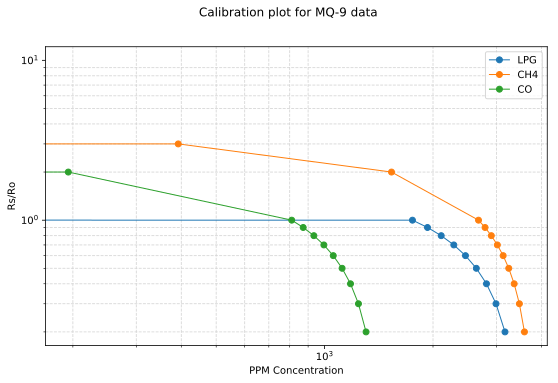

In [18]:
%config InlineBackend.figure_formats = ['svg']
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

fig, ax = plt.subplots()

fig.set_size_inches(9, 5.5, forward=True)
fig.set_dpi(200)

# only these two lines are calibration curves
plt.plot(MQ9_LPG, x_MQ9, marker='o', linewidth=1, label='LPG')
plt.plot(MQ9_CH4, x_MQ9, marker='o', linewidth=1, label='CH4')
plt.plot(MQ9_CO, x_MQ9, marker='o', linewidth=1, label='CO')


# reference line, legends, and axis labels
#line = mlines.Line2D([0, 1], [0, 1], color='black')
#transform = ax.transAxes
#line.set_transform(transform)
#ax.add_line(line)
plt.yscale('log')
plt.xscale('log')
plt.legend()

plt.grid(b=True, which='minor', color='lightgrey', linestyle='--')

fig.suptitle('Calibration plot for MQ-9 data')
ax.set_xlabel('PPM Concentration')
ax.set_ylabel('Rs/Ro')


#Save image
plt.savefig('MQ9.svg', format = 'svg', dpi = 1200)
plt.savefig('MQ9.png')
plt.savefig('MQ9.eps', format = 'eps', dpi = 1200)